In [1]:
import os
import pandas as pd

In [39]:
def merge_metrics_dataframes(analysis_folder):
    # Initialize an empty DataFrame to store merged metrics
    merged_metrics_df = pd.DataFrame(columns=["ID", "File Instance"])

    # Iterate through files in the analysis folder
    for root, dirs, files in os.walk(analysis_folder):
        for file in files:
            file_path = os.path.join(root, file)

            if file.endswith("metrics.csv"):
                metrics_df = pd.read_csv(file_path)
                merged_metrics_df = pd.merge(merged_metrics_df, metrics_df, on=["ID", "File Instance"], how="outer", suffixes=('_merged', '_metrics'))

    return merged_metrics_df

In [40]:
data_df = merge_metrics_dataframes(os.getcwd())
data_df

,ID,File Instance,GA Population Size,GA Generations,GA Mutate Mode,GA Crossover Mode,GA Score,GA Time,GA Memory,SA Score,...,Tabu Score,Tabu Time,Tabu Memory,Tabu Tenure,Candidate List Size,Max Iterations,HC Score,HC Time,HC Memory,HC Iterations
0,1,data/a_example.in,300,"(15, 1)",swap,mid,76,10.609254,5195530,18,...,21,0.002417,25048,7,-1,100,18,0.000799,25048,100
1,2,data/a_example_2.in,300,"(15, 1)",swap,mid,76,10.473913,5196785,25,...,76,1.819947,225888,7,-1,100,25,0.001235,23456,200
2,3,data/a_example_3.in,300,"(15, 1)",swap,mid,76,10.473913,5196785,35,...,3092,230.903064,7530565,7,-1,100,35,0.002346,34567,300


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_algorithms(data_df, id):
    algorithms = ['GA', 'SA', 'Tabu', 'HC', 'Initial']
    metrics = ['Score', 'Time', 'Memory']

    sns.set_style("whitegrid")
    fig, axes = plt.subplots(len(metrics), 1, figsize=(5, 10))

    id_data = data_df[data_df['ID'] == id]

    for i, metric in enumerate(metrics):
        data = pd.DataFrame()
        for algorithm in algorithms:
            data[algorithm] = id_data[f"{algorithm} {metric}"]
        
        sns.barplot(data=data, ax=axes[i])
        axes[i].set_xlabel('Algorithm')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f"Comparison of {metric} for Different Algorithms (ID={id})")

        # Set the value of each bar
        for bar in axes[i].patches:
            axes[i].annotate(format(bar.get_height(), '.2f'), 
                             (bar.get_x() + bar.get_width() / 2, 
                              bar.get_height()), 
                             ha='center', va='center', 
                             size=10, xytext=(0, 2.5),
                             textcoords='offset points')

    plt.tight_layout()
    plt.show()

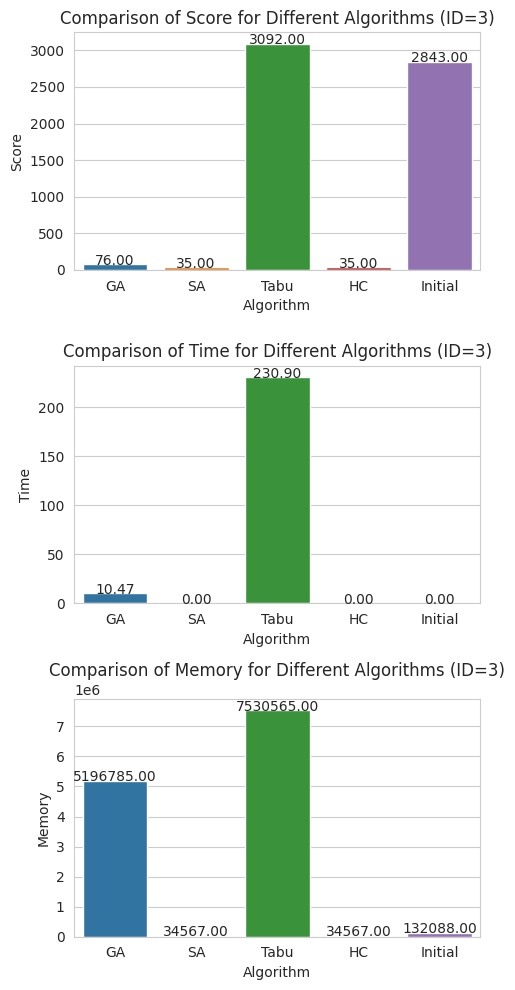

In [36]:
compare_algorithms(data_df, max(data_df.ID))

In [ ]:
# Initialize an empty dictionary to store solution history DataFrames
solution_history_dfs = {}

# Iterate through files in the analysis folder again
for root, dirs, files in os.walk(analysis_folder):
    for file in files:
        # Check if the file is a solution history CSV
        if file.endswith("solutions_history.csv"):
            file_path = os.path.join(root, file)
            # Read the solution history CSV file
            solution_history_df = pd.read_csv(file_path)
            # Extract ID from the file name
            id_value = file.split("_")[0]
            # Store the DataFrame in the dictionary using ID as the key
            solution_history_dfs[id_value] = solution_history_df

# Now you have merged_metrics_df containing all metrics merged by ID
# And solution_history_dfs containing different DataFrames for each solution history